In [28]:
import pandas as pd
df = pd.read_csv('data/data_temp.csv')
df.drop(['ProductCategory', 'DayTime'], axis=1, inplace=True)

In [29]:
df.head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,PricingStrategy,FraudResult,TransactionWeekday,DebitCredit,ValueUSDLog
0,36123,3957,887,4406,6,10,3,2,0,4,0,-1.272966
1,15642,4841,3829,4406,4,6,2,2,0,4,1,-5.184989
2,53941,4229,222,4683,6,1,3,2,0,4,0,-1.966113
3,102363,648,2185,988,1,21,3,2,0,4,0,1.808944
4,38780,4841,3829,988,4,6,2,2,0,4,1,-1.713022


### Oversampling with SMOTE

In [6]:
!pip install imblearn

     |████████████████████████████████| 199 kB 905 kB/s            


In [43]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import recall_score, roc_auc_score, roc_curve

In [30]:
# define X and y
X = df.drop('FraudResult', axis = 1)
y = df.FraudResult

#train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)


In [32]:
# apply resampling ONLY to train data
X_res, y_res = SMOTE().fit_resample(X_train, y_train)

In [45]:
scaler = StandardScaler()

#standardization of train set (fit_transform)
X_res_stand = scaler.fit_transform(X_res)

#change array to dataframe
scaled_df_resampled = pd.DataFrame(X_res_stand)
scaled_df_resampled.columns = X.columns


#standardization of test set (transform)
X_res_test_stand = scaler.transform(X_test)

#change array to dataframe
scaled_dftest_resampled = pd.DataFrame(X_res_test_stand)
scaled_dftest_resampled.columns = X.columns


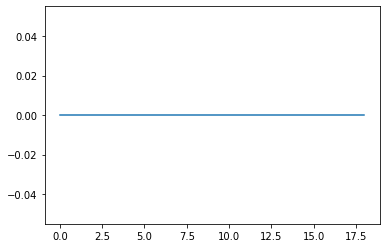

0.0
0


In [46]:
recall_lst = []
for k in range(1,20):
        knni = KNeighborsClassifier(n_neighbors=k, p=2, weights="distance", metric="minkowski")
        knni.fit(scaled_df_resampled, np.ravel(y_res))
        y_predlini = knni.predict(X_test)
        recall_lst.append(recall_score(y_test, y_predlini))
    
#Recall_lst
plt.plot(recall_lst)
plt.show()
print(max(recall_lst))
print(np.argmax(recall_lst))